Метрики для каждой целевой переменной:

F8:
MAE: 24.649
RMSE: 32.493
R²: 0.68

F9:
MAE: 1.013
RMSE: 1.866
R²: 0.903

Время выполнения: 0.73 секунд


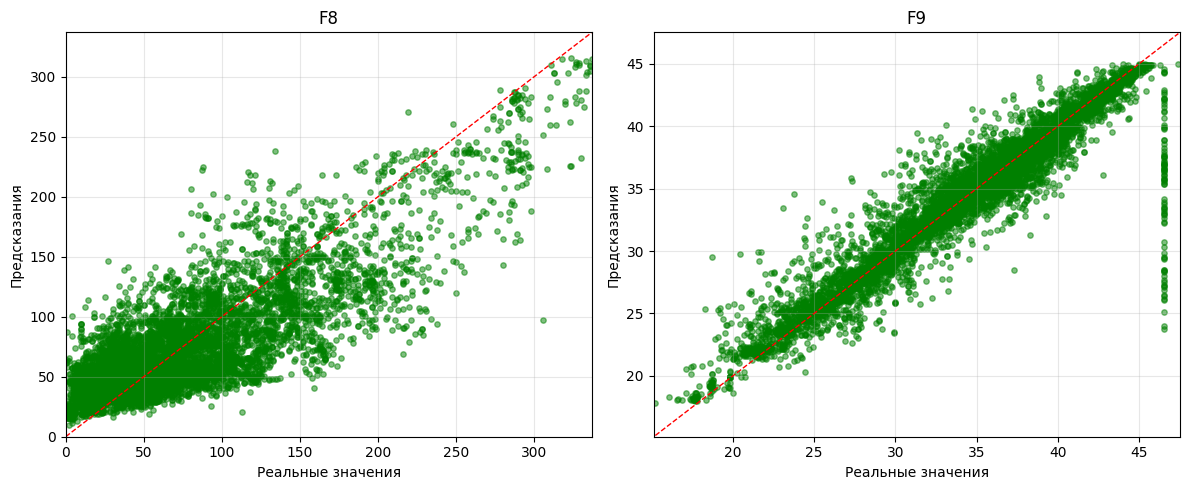

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загрузка данных
file_path = 'CASP.csv'
df = pd.read_csv(file_path)

# Предобработка данных
X = df.drop(columns=['F8', 'F9'])  # Все признаки, кроме целевых
y = df[['F8', 'F9']]               # Целевые переменные

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Создание и обучение модели Gradient Boosting
start_time = time.time()
model = MultiOutputRegressor(
    XGBRegressor(
        n_estimators=150,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        random_state=42
    )
)
model.fit(X_train, y_train)
end_time = time.time()

# Предсказания
y_pred = model.predict(X_test)

# Вычисление метрик
metrics = {}
for i, target in enumerate(['F8', 'F9']):
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    
    metrics[target] = {
        'MAE': round(mae, 3),
        'RMSE': round(rmse, 3),
        'R²': round(r2, 3)
    }

# Вывод результатов
print("Метрики для каждой целевой переменной:")
for target, values in metrics.items():
    print(f"\n{target}:")
    print(f"MAE: {values['MAE']}")
    print(f"RMSE: {values['RMSE']}")
    print(f"R²: {values['R²']}")

print(f"\nВремя выполнения: {round(end_time - start_time, 2)} секунд")

# Визуализация
plt.figure(figsize=(12, 5))
targets = ['F8', 'F9']

for i, target in enumerate(targets):
    plt.subplot(1, 2, i+1)
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5, s=15, color='green')
    min_val = min(y_test.iloc[:, i].min(), y_pred[:, i].min())
    max_val = max(y_test.iloc[:, i].max(), y_pred[:, i].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1)
    plt.xlabel('Реальные значения', fontsize=10)
    plt.ylabel('Предсказания', fontsize=10)
    plt.title(f'{target}', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xlim(min_val-0.1, max_val+0.1)
    plt.ylim(min_val-0.1, max_val+0.1)
    
   

plt.tight_layout()
plt.show()